In [32]:
from tensorflow.python.client import device_lib
import threading
threading.activeCount()


5

In [33]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Dependencies

In [4]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.transform import resize
from PIL import Image,ImageTk
seed = 420
np.random.seed(seed)

In [6]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [36]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, Adam

def split(word):
    word = word.replace(".","")
    word = word.replace("&","")

    return list(word)

def define(lword):
    return [ffold_dict[let] for let in lword]

def floc(lwor):
    return [folder_dict[num] for num in lwor]

def redefine(labeled):
    return [word_dict[lab] for lab in labeled]

def convert(s):
    new = ""
    for x in s:
        new +=x
    return new

# Retrieving Data

In [38]:
import os
import random
import cv2
from english_words import english_words_alpha_set

label_array = [0,0]*32
label = []  #floc #ALSO y_train
fold_array = [] #define
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',
             16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z',26: 'a', 27: 'b', 28: 'c', 29: 'd', 30: 'e',
            31: 'f', 32: 'g', 33: 'h', 34: 'i', 35: 'j', 36: 'k', 37: 'l', 38: 'm', 39: 'n', 40: 'o', 41: 'p', 42: 'q', 43: 'r',
            44: 's', 45: 't', 46: 'u', 47: 'v', 48: 'w', 49: 'x', 50: 'y', 51: 'z', 52: '0', 53: '1', 54: '2', 55: '3', 56: '4',
            57: '5', 58: '6', 59: '7', 60: '8', 61: '9'}

folder_dict = {0:'A_',1:'B_',2:'C_',3:'D_',4:'E_',5:'F_',6:'G_',7:'H_',8:'I_',9:'J_',10:'K_',11:'L_',12:'M_',13:'N_',14:'O_',15:'P_',
             16:'Q_',17:'R_',18:'S_',19:'T_',20:'U_',21:'V_',22:'W_',23:'X_', 24:'Y_',25:'Z_',26: 'a', 27: 'b', 28: 'c', 29: 'd', 30: 'e',
            31: 'f', 32: 'g', 33: 'h', 34: 'i', 35: 'j', 36: 'k', 37: 'l', 38: 'm', 39: 'n', 40: 'o', 41: 'p', 42: 'q', 43: 'r',
            44: 's', 45: 't', 46: 'u', 47: 'v', 48: 'w', 49: 'x', 50: 'y', 51: 'z', 52: '0', 53: '1', 54: '2', 55: '3', 56: '4',
            57: '5', 58: '6', 59: '7', 60: '8', 61: '9'}

ffold_dict = {v:k for k, v in word_dict.items()}
words = list(english_words_alpha_set)






In [39]:
#defining words
for word in words:
        start = define(split(word))
        label.append(start)
        if len(floc(start)) <5:
            fold_array.append(floc(start))


    


In [40]:
wordcounts = int(len(fold_array))
wordcounts

3156

In [9]:
###FOR MULTITHREADING
# def conver(a,b,count):
#     pos = a
#     for x in fold_array[a:b]:
#         #label counts
#         hold.append(pos)
#         #labeling file
#         act_word = convert(redefine(label[pos]))
#         names.append(act_word)
#         #randomizing letter handwriting
#         for y in x:
#             fn1 = random.choice(os.listdir(f'by_class/{y}'))
#             try:
#                 images.append(cv2.imread(f'by_class/{y}/{fn1}')[20:100,40:90])
#             except Exception:
#                 fn1 = random.choice(os.listdir(f'by_class/{y}'))
#                 images.append(cv2.imread(f'by_class/{y}/{fn1}')[20:100,40:90])
#                 print(y,fn1)
#         im = cv2.hconcat(images)
#         im = cv2.resize(~im,(56,28), interpolation = cv2.INTER_AREA)
#         cv2.imwrite(f'test/{act_word}{count}.png',im)
#         X.append(im)
#         cv2.imwrite(f'test/{act_word}{count}.png',im)  #DONT FORGET TO CHANGE BACK TO "words" folder from test
#         pos+=1
#     return X,hold,names

In [41]:
#defining images
hold = []
images = []
pos = 0
X = []
names = []
count = 0
threadId = 4 # thread counter
wordcounts = len(fold_array)

while count < 5: 
    hcount = 0
    images = [] #temp
    pos = 0 #temp
    count +=1
    for x in fold_array[0:5]:
        #label counts
        hold.append(hcount)
        hcount +=1
        
        #labeling file
        act_word = convert(x)
#         act_word = convert(redefine(label[pos]))
        #randomizing letter handwriting        
        for y in x:
            fn1 = random.choice(os.listdir(f'by_class/{y}'))
            try:
                images.append(cv2.imread(f'by_class/{y}/{fn1}')[20:100,40:90])
            except Exception:
                fn1 = random.choice(os.listdir(f'by_class/{y}'))
                images.append(cv2.imread(f'by_class/{y}/{fn1}')[20:100,40:90])
                print(y,fn1)
        im = cv2.hconcat(images)
        im = cv2.resize(~im,(112,112), interpolation = cv2.INTER_AREA)
        X.append(im)
        cv2.imwrite(f'showing/{act_word}{count}.png',im)  #DONT FORGET TO CHANGE BACK TO "words" folder from test
        images = []
        pos += 1   


   #print (count)
####CuRRENTLY NOT NEEDED        
#Normalizes Array after writing to it
##biglist = max(len(ui) for ui in label)
##for l in label: 
##    l += [0] * (biglist - len(l))
    
##labend = int(len(X)/count)
##holdy = label[0:labend]*count

In [301]:
dftest = pd.DataFrame(hold)
rows_list = []
for rows in X: 
        holdrow = rows.ravel()
        holdrow = np.delete(holdrow, np.arange(0, holdrow.size, 3))
        holdrow = np.delete(holdrow, np.arange(0, holdrow.size, 2))
        rows_list.append(holdrow.ravel())
dfhold = pd.DataFrame(rows_list) 

In [15]:
path = "A_Z Handwritten Data.csv"
alpha_data = pd.read_csv(path).astype('float32')



# Data Translation from Image to Arrays

In [161]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps

image_size = (28,28)
letlab = []
letarr = []
lcount = 0
for numf in range(62):
    for lcount in range(12001):
        #Append Label
        letlab.append(numf)
        
        #Foldername for the related folder
        foldername = folder_dict[numf]
        imgfn = random.choice(os.listdir(f'by_class/{foldername}'))
        imgpath = 'by_class/'+foldername+'/'+imgfn
        
        #Loading the image
        try: 
            im = image.load_img(imgpath, target_size=image_size, color_mode="grayscale")
        except Exception:
            print(imgpath)
            imgfn = random.choice(os.listdir(f'by_class/{foldername}'))
            imgpath = 'by_class/'+foldername+'/'+imgfn
            print(imgpath)
            im = image.load_img(imgpath, target_size=image_size, color_mode="grayscale")

        
        im_invert = ImageOps.invert(im) #image inversion
        imarr = img_to_array(im_invert) #image to array
        letarr.append(imarr.ravel())
    print(numf,lcount)
        
        

    
    

0 12000
1 12000
2 12000
3 12000
4 12000
5 12000
6 12000
7 12000
8 12000
9 12000
10 12000
11 12000
12 12000
13 12000
14 12000
15 12000
16 12000
17 12000
18 12000
19 12000
20 12000
21 12000
22 12000
23 12000
24 12000
25 12000
by_class/a/desktop.ini
by_class/a/hsf_1_00344.png
26 12000
27 12000
28 12000
29 12000
30 12000
31 12000
32 12000
33 12000
34 12000
35 12000
36 12000
37 12000
38 12000
39 12000
40 12000
41 12000
42 12000
43 12000
44 12000
45 12000
46 12000
47 12000
48 12000
49 12000
by_class/y/desktop.ini
by_class/y/train_79_02149.png
50 12000
51 12000
by_class/0/desktop.ini
by_class/0/hsf_0_03356.png
by_class/0/desktop.ini
by_class/0/hsf_0_04250.png
by_class/0/desktop.ini
by_class/0/hsf_0_04892.png
52 12000
by_class/1/desktop.ini
by_class/1/train_31_20304.png
53 12000
by_class/2/train_32
by_class/2/train_32_29361.png
54 12000
55 12000
56 12000
57 12000
58 12000
59 12000
60 12000
61 12000


In [162]:
letter_labels = pd.DataFrame(letlab)
letter_arrays = pd.DataFrame(letarr)
letter_arrays

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Splitting images and label names
Z = alpha_data.drop('0',axis = 1)
w = alpha_data['0']

# Z = letter_arrays
# w = letter_labels


In [17]:
alpha_data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Setting up the Words Model

In [302]:
#Training Words Model
y = dftest[0]
X = dfhold
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = seed)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)
print("Training Shape:", y_train.shape)
print("Testing Shape:", y_test.shape)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training Shape: (50496, 12544)
Testing Shape: (12624, 12544)
Training Shape: (50496,)
Testing Shape: (12624,)


In [303]:
#Reshaping Words #6272
X_train = X_train.reshape(X_train.shape[0], 112,112,1)
X_test = X_test.reshape(X_test.shape[0],112,112,1)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (50496, 112, 112, 1)
Testing Shape: (12624, 112, 112, 1)


In [304]:
#Changing to categorical
y_train= to_categorical(y_train, num_classes = wordcounts)
print("New shape of train labels: ", y_train.shape)
y_test= to_categorical(y_test, num_classes = wordcounts)
print("New shape of train labels: ", y_train.shape)

New shape of train labels:  (50496, 3156)
New shape of train labels:  (50496, 3156)


In [308]:
dftest = pd.DataFrame(hold)
dftest

,0
0,0
1,1
2,2
3,3
4,4
...,...
63115,3151
63116,3152
63117,3153
63118,3154


# Setting up the Letters Model

In [26]:
#Training LETTERS model
Z_train, Z_test, w_train, w_test = train_test_split(Z,w,test_size = 0.2, random_state = seed)
print("Training Shape:", Z_train.shape)
print("Testing Shape:", Z_test.shape)
print("Training Data Labels Shape:", w_train.shape)
print("Training Data Labels Shape:", w_train.shape)
# scale data
scaler = MinMaxScaler().fit(Z_train)
Z_train = scaler.transform(Z_train)
Z_test = scaler.transform(Z_test)

Training Shape: (297960, 784)
Testing Shape: (74490, 784)
Training Data Labels Shape: (297960,)
Training Data Labels Shape: (297960,)


In [27]:
#Reshaping LETTERS
Z_train = Z_train.reshape(Z_train.shape[0], 28,28,1)
Z_test = Z_test.reshape(Z_test.shape[0],28,28,1)
print("Training Shape:", Z_train.shape)
print("Testing Shape:", Z_test.shape)

Training Shape: (297960, 28, 28, 1)
Testing Shape: (74490, 28, 28, 1)


In [28]:
#Changing to categorical
w_train= to_categorical(w_train, num_classes = 26, dtype = 'int')
print("New shape of train labels: ", w_train.shape)
w_test= to_categorical(w_test, num_classes = 26, dtype = 'int')
print("New shape of train labels: ", w_train.shape)

New shape of train labels:  (297960, 26)
New shape of train labels:  (297960, 26)


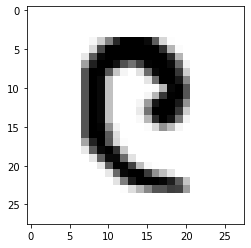

In [29]:
from sklearn.utils import shuffle
tf.debugging.set_log_device_placement(True)

shuf = shuffle(Z_train[:100])
test = np.expand_dims(Z_train[100], axis=0)
test.shape
plt.imshow(shuf[40].reshape(28,28),interpolation='nearest', cmap='Greys')
#CHECKING AN IMAGE

# Building the Words Model

In [2]:
#Words MODEL
Wmodel = Sequential()


Wmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(112,112,1)))
Wmodel.add(MaxPool2D(pool_size=(2, 2), strides=2))

Wmodel.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'))
Wmodel.add(MaxPool2D(pool_size=(2, 2), strides=2))

Wmodel.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding = 'valid'))
Wmodel.add(MaxPool2D(pool_size=(2, 2), strides=2))

Wmodel.add(Flatten())

Wmodel.add(Dense(50,activation ="relu"))
Wmodel.add(Dense(10,activation ="relu"))

Wmodel.add(Dense(10,activation ="softmax")) #3156
Wmodel.summary()

NameError: name 'Sequential' is not defined

# Building the Letters Model

In [30]:
#LETTERS MODEL
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(52,activation ="relu"))

model.add(Dense(26,activation ="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

# Compile and Train

In [312]:
with tf.device('/GPU:0'):

    Wmodel.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    history = Wmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, verbose=2)



Epoch 1/4


ValueError: in user code:

    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Amol\anaconda3\envs\ev_2\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 3156) and (32, 128) are incompatible


In [306]:
from tensorflow.keras.models import load_model
Wmodel.save('word_model_upgrade.h5')

In [34]:
with tf.device('/GPU:0'):
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    history = model.fit(Z_train, w_train, validation_data=(Z_test, w_test), epochs=6, verbose=2)



Epoch 1/6
9312/9312 - 31s - loss: 0.0506 - accuracy: 0.9858 - val_loss: 0.0557 - val_accuracy: 0.9848
Epoch 2/6
9312/9312 - 31s - loss: 0.0372 - accuracy: 0.9893 - val_loss: 0.0490 - val_accuracy: 0.9866
Epoch 3/6
9312/9312 - 31s - loss: 0.0296 - accuracy: 0.9914 - val_loss: 0.0408 - val_accuracy: 0.9890
Epoch 4/6
9312/9312 - 31s - loss: 0.0249 - accuracy: 0.9926 - val_loss: 0.0399 - val_accuracy: 0.9894
Epoch 5/6
9312/9312 - 32s - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.0357 - val_accuracy: 0.9913
Epoch 6/6
9312/9312 - 31s - loss: 0.0192 - accuracy: 0.9943 - val_loss: 0.0335 - val_accuracy: 0.9920


In [35]:
model.save('base_letter_model.h5')

# Testing

Predicted class: [0]


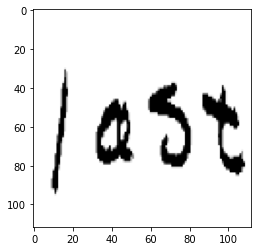

In [222]:
img_path = "last.png"

from tensorflow.keras.preprocessing import image
image_size = (112, 112)
im = image.load_img(img_path, target_size = image_size, color_mode = "grayscale")

from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255
 
img = image.flatten().reshape(-1,112,112,1)
img.shape
plt.imshow(img.reshape(112,112), cmap=plt.cm.Greys)


print(f"Predicted class: {Wmodel.predict_classes(img)}")

In [ ]:
im = cv2.resize(~im,(224,112), interpolation = cv2.INTER_AREA)

54 2


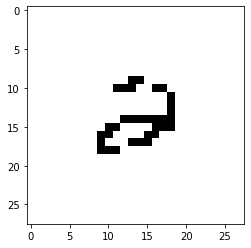

In [214]:
#Test cases for N!
checkingnum = 
plt.imshow(Z_train[checkingnum].reshape(28,28),interpolation='nearest', cmap='Greys')
print(list(w_train[checkingnum]).index(1),word_dict[list(w_train[checkingnum]).index(1)])

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op M

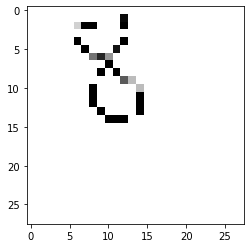

In [190]:
img_path = "testing images/test 8.png"

from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(img_path, target_size = image_size, color_mode = "grayscale")

from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
# print(image)
img = image.flatten().reshape(-1, 28,28,1)

img.shape
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)


print(f"Predicted class: {model.predict_classes(img)}")

In [42]:
from tensorflow.keras.models import load_model
import os


model = load_model('word_model.h5')

Predicted class: [1]


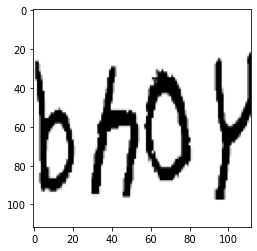

In [47]:
img_path = "testing images/bhoy1.png"
from tensorflow.keras.preprocessing import image

image_size = (112, 112)
im = image.load_img(img_path, target_size = image_size, color_mode = "grayscale")

from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255
 
img = image.flatten().reshape(-1,112,112,1)
img.shape
plt.imshow(img.reshape(112,112), cmap=plt.cm.Greys)


print(f"Predicted class: {model.predict_classes(img)}")